### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [1]:
import numpy as np

m = np.arange(12).reshape((3,4))
print(m)

for i in range(len(m)):
    print("The avg of the " + str(i+1) + "th row is: ", m[i].mean())

for i in range(len(m.transpose())):
    print("The avg of the " + str(i+1) + "th column is: ", m.transpose()[i].mean())

print("The overall mean is: ", m.mean())

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
The avg of the 1th row is:  1.5
The avg of the 2th row is:  5.5
The avg of the 3th row is:  9.5
The avg of the 1th column is:  4.0
The avg of the 2th column is:  5.0
The avg of the 3th column is:  6.0
The avg of the 4th column is:  7.0
The overall mean is:  5.5


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [2]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

print(np.outer(u, v))

outer = np.array([[i*j for i in v] for j in u])

print(outer)

u = u.reshape(4, 1)

outer = u*v

print(outer)

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [3]:
matrix = np.random.random(60).reshape(10, 6)

for i in range(len(matrix)):
    print((matrix[i]<0.1))
    if ((matrix[i]<0.1).any()):
        matrix[i] = 0
        
print(matrix)

[False False False False False False]
[False False False False  True False]
[False False False False False False]
[False False False False False False]
[False False False False False False]
[False False False False False False]
[False False False  True False False]
[False False False False False False]
[False False False False False False]
[False False False False False False]
[[0.33147606 0.23487032 0.41558306 0.10066558 0.58625576 0.22635488]
 [0.         0.         0.         0.         0.         0.        ]
 [0.39638743 0.99513638 0.30758297 0.25852318 0.20448389 0.20181331]
 [0.59158294 0.39451034 0.60860786 0.44047724 0.66279295 0.90480965]
 [0.40724736 0.77473237 0.10954033 0.26389482 0.23840956 0.62345458]
 [0.78965548 0.24883943 0.13470678 0.59923761 0.28844439 0.73969099]
 [0.         0.         0.         0.         0.         0.        ]
 [0.15668993 0.49364233 0.6022939  0.27698929 0.20410593 0.36411636]
 [0.93111472 0.43151811 0.33951894 0.11533162 0.85783851 0.6461239 ]

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

[0.         0.63466518 1.26933037 1.90399555 2.53866073 3.17332591
 3.8079911  4.44265628 5.07732146 5.71198664]
[6.28318531 6.21971879 6.15625227 6.09278575 6.02931923 5.96585272
 5.9023862  5.83891968 5.77545316 5.71198664 5.64852012 5.58505361
 5.52158709 5.45812057 5.39465405 5.33118753 5.26772102 5.2042545
 5.14078798 5.07732146 5.01385494 4.95038842 4.88692191 4.82345539
 4.75998887 4.69652235 4.63305583 4.56958931 4.5061228  4.44265628
 4.37918976 4.31572324 4.25225672 4.1887902  4.12532369 4.06185717
 3.99839065 3.93492413 3.87145761 3.8079911  3.74452458 3.68105806
 3.61759154 3.55412502 3.4906585  3.42719199 3.36372547 3.30025895
 3.23679243 3.17332591 3.10985939 3.04639288 2.98292636 2.91945984
 2.85599332 2.7925268  2.72906028 2.66559377 2.60212725 2.53866073
 2.47519421 2.41172769 2.34826118 2.28479466 2.22132814 2.15786162
 2.0943951  2.03092858 1.96746207 1.90399555 1.84052903 1.77706251
 1.71359599 1.65012947 1.58666296 1.52319644 1.45972992 1.3962634
 1.33279688 1.2693

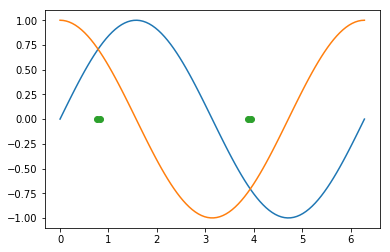

In [4]:
import matplotlib.pyplot as plt

%matplotlib inline

a100 = np.linspace(0.,  2*np.pi, 100)

b = a100[::10]
print(b)

a100r = a100[::-1]
print(a100r)

mask = [np.absolute(np.sin(a100) - np.cos(a100))<0.1]

print(mask)

test = a100[mask]
print(test)

ytest = test*0

plt.plot(a100, np.sin(a100), a100, np.cos(a100), test, ytest, 'o')

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anti-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [5]:
mult10 = np.array([[i*j for i in range(1,11)] for j in range(1,11)])
print(mult10)

tr = np.sum(mult10[i][i] for i in range(len(mult10)))
print("\nThe trace is: ", tr, "\n")

antid = np.array([mult10[i][-i-1] for i in range(0, 10)])
print("The anti-diagonal is: ", antid)

updiag = np.array([mult10[i][i+1] for i in range(0, 9)])
print("The off-set1 diagonal is: ", updiag)

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]

The trace is:  385 

The anti-diagonal is:  [10 18 24 28 30 30 28 24 18 10]
The off-set1 diagonal is:  [ 2  6 12 20 30 42 56 72 90]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [6]:
cities_r_66 = np.array(["Chicago", "Springfield", "Saint-Louis", "Tulsa, Oklahoma City", "Amarillo, Santa Fe", "Albuquerque, Flagstaff", "Los Angeles"])
city_positions = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])

cities_distances = np.absolute(city_positions.reshape(10, 1) - city_positions)

print(cities_distances)

dist_km = np.round(cities_distances/1.609)

print(dist_km)

# Adding cities as first row and column

[[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]]
[[   0.  123.  188.  457.  541.  730.  917.  960. 1189. 1521.]
 [ 123.    0.   65.  334.  418.  607.  794.  837. 1066. 1398.]
 [ 188.   65.    0.  269.  353.  542.  728.  771. 1001. 1333.]
 [ 457.  334.  269.    0.   84.  273.  459.  502.  732. 1064.]
 [ 541.  418.  353.   84.    0.  189.  375.  418.  648.  980.]
 [ 730.  607.  542.  273.  189.    0.  186.  229.  459.  791.]
 [ 917.  794.  728.  459.  375.  186.    0.   43.  272.  605.]
 [ 960.  837.  771.  502.  4

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [42]:
till_num = 10000

def sieve_prime(till_num):
    sieve = np.array(np.zeros(till_num), "bool")
    # Metodo più generale
    # sieve = np.array([True/False for i in range(100)])
    for i in range(till_num):
        # guardo se il numero è primo
        if (i != 0 and i != 1):
            d = int(i**0.5)    # mi fermo a cercare i divisori alla radice del numero (devo solamente verificare se è primo)
            while d > 1:
                if i % d == 0:    # Cerco se il numero "test" è divisibile per il divisore d
                    d = 0            # Se trovo un divisore allora fermo la ricerca dei divisori
                else:
                    d -= 1
            if d == 1:               # Se d=1 allora significa che ho 
                sieve[i-1] = True
    return sieve

#till_num = 100
#for i in range(4):
#    till_num *= 10
#    %timeit sieve_prime(till_num)
%timeit sieve_prime(100000)

sieve = sieve_prime(till_num)
primes = np.array([i for i in range(1, till_num+1)])
#print(primes)
primes = primes[sieve]
print(primes)

39.4 s ± 402 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
[   2    3    5 ... 9949 9967 9973]


$\textbf{Results of a previous run}$

For till_num = 1000: 1.19 ms ± 72.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

For till_num = 10000: 28.1 ms ± 3.02 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

For till_num = 40000: 254 ms ± 2.33 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

For till_num = 60000: 476 ms ± 5.82 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

For till_num = 80000: 717 ms ± 4.38 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

For till_num = 100000: 925 ms ± 89.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

For till_num = 400000: 9.01 s ± 39.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

For till_num = 600000: 17.2 s ± 68.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

For till_num = 800000: 27.3 s ± 196 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

For till_num = 1000000: 39.4 s ± 873 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

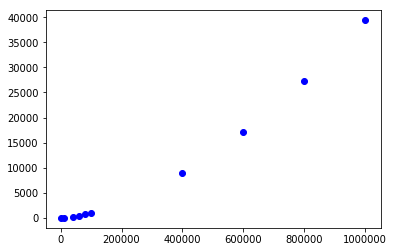

In [43]:
plt.plot([1000, 10000, 40000, 60000, 80000, 100000, 400000, 600000, 800000, 1000000], [1.19, 28.1, 254, 476, 717, 925, 9010, 17200, 27300, 39400], "bo")

In [44]:
print("This programme will search for all prime numbers from 2 to the square of a given prime nunmber using the Eratosthenes algorythm.")
lower_prime = int(input("Insert the lower prime u know: "))
upper_limit = lower_prime**2

to_search = np.array([i for i in range(2, upper_limit)])

sieve = np.array([True for i in range(2, upper_limit)])

for n in to_search:
    if sieve[n-2] == True:
        # print(n)
        sieve_index = [i-2 for i in range(n*n, upper_limit, n)]
        sieve[sieve_index] = False

# TO PRINT IN AN EXTENDED FORM
#for num in to_search[sieve]:
#    print(num)

primes = to_search[sieve]

print(primes)

This programme will search for all prime numbers from 2 to the square of a given prime nunmber using the Eratosthenes algorythm.
Insert the lower prime u know: 101
[    2     3     5 ... 10177 10181 10193]


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

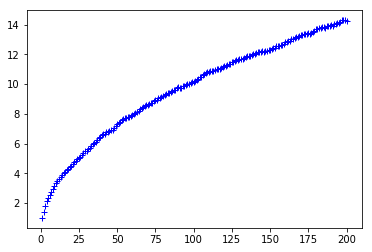

In [86]:
steps = np.random.randint(0, 2, size=(1000, 200))
steps[steps == 0] = -1

for l in range(steps.shape[0]):
    for c in range(steps.shape[1] - 1, - 1, -1):
        steps[l][c] = steps[l,:c+1].sum()

steps = steps**2

avgs = np.zeros(200)

for c in range(steps.shape[1]):
    avgs[c] = steps[:,c].mean()

x_d = np.array([i for i in range(1, 201)])

plt.plot(x_d, np.sqrt(avgs), 'b+')

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

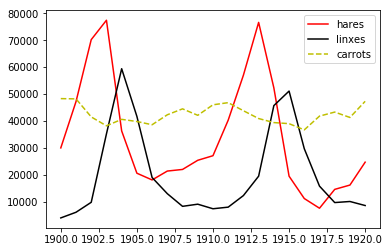

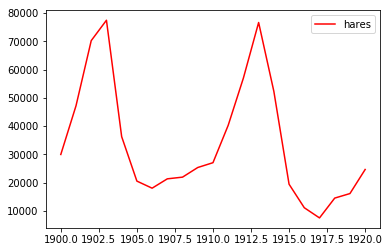

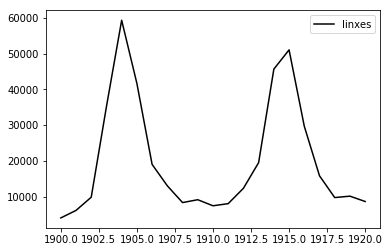

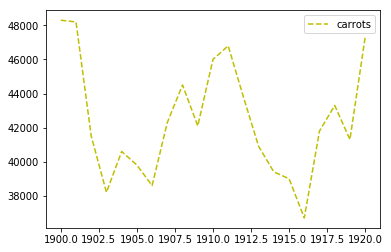

Features of hares population among years:
Mean:  34080.95238095238
Variance:  20897.906458089667
Correlation in time:  [3.356291e+10] 

Features of lynxes population among years:
Mean:  20166.666666666668
Variance:  16254.591536908763
Correlation in time:  [1.408903e+10] 

Features of carrots population among years:
Mean:  42400.0
Variance:  3322.5062255844787
Correlation in time:  [3.798478e+10] 

The maximum population at the year: 1900 is that of the carrots
The maximum population at the year: 1901 is that of the carrots
The maximum population at the year: 1902 is that of the hares
The maximum population at the year: 1903 is that of the hares
The maximum population at the year: 1904 is that of the lynxes
The maximum population at the year: 1905 is that of the lynxes
The maximum population at the year: 1906 is that of the carrots
The maximum population at the year: 1907 is that of the carrots
The maximum population at the year: 1908 is that of the carrots
The maximum population at th

In [127]:
data = np.loadtxt("populations.txt", skiprows = 1)

years   = data[:,0]
hares   = data[:,1]
lynxes  = data[:,2]
carrots = data[:,3]

# Plot together
plt.plot(years, hares, 'r-', label = "hares")
plt.plot(years, lynxes, 'k-', label = "linxes")
plt.plot(years, carrots, 'y--', label = "carrots")
plt.legend()
plt.show()
# Make different plots
plt.plot(years, hares, 'r-', label = "hares")
plt.legend()
plt.show()
plt.plot(years, lynxes, 'k-', label = "linxes")
plt.legend()
plt.show()
plt.plot(years, carrots, 'y--', label = "carrots")
plt.legend()
plt.show()

print("Features of hares population among years:")
print("Mean: ", hares.mean())
print("Variance: ", hares.std())
print("Correlation in time: ", np.correlate(hares, hares), "\n")
print("Features of lynxes population among years:")
print("Mean: ", lynxes.mean())
print("Variance: ", lynxes.std())
print("Correlation in time: ", np.correlate(lynxes, lynxes), "\n")
print("Features of carrots population among years:")
print("Mean: ", carrots.mean())
print("Variance: ", carrots.std())
print("Correlation in time: ", np.correlate(carrots, carrots), "\n")

populations = np.array(["hares", "lynxes", "carrots"])

for year in range(len(data)):
    print("The maximum population at the year:", int(data[year][0]), "is that of the", populations[data[year,1:4].argmax()])